# Introduction


We analyze the data for public tenders winners for Romania, covering the period 2007-2016.
The period is covering the first decade after the Romanian accession to EU.

The original data is in Romanian, therefore some of the fields (especially classes for the categorical fields) might be a bit difficult to interpret.



# Analysis preparation

## Load packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load the data

In [2]:
data_df = pd.read_csv("/kaggle/input/public-tenders-romania-20072016/contracts.csv", low_memory=False)

In [3]:
print(f"Data rows: {data_df.shape[0]} columns: {data_df.shape[1]}")

Data rows: 887642 columns: 39


In [4]:
data_df.head()

Winner Winner_VAT Winner_Country Winner_City  \
0          Top Diagnostics S.R.L.   10572840        Romania   Bucuresti   
1  A&A MEDICAL SRL SUCURSALA IASI   11461697        Romania        IASI   
2                 SC POLISANO SRL    4101148        Romania       Sibiu   
3          A&G MED TRADING S.R.L.    9717409        Romania   Bucuresti   
4           S.C CONSPROIECT S.R,L    6589550        Romania      Resita   

                                 Winner_Address  \
0                     Str Orlando Nr 6 Sector 1   
1             STR. PROF. I. SIMIONESCU, BL. SD9   
2                             Str. 9 MAI, Bl.77   
3  Str. Crisul Alb nr. 9-13 sector 4  Bucuresti   
4                        Aleea Sportivilor nr.6   

                                         Type Contract_Type  \
0  Anunt de atribuire la anunt de participare     Furnizare   
1  Anunt de atribuire la anunt de participare     Furnizare   
2  Anunt de atribuire la anunt de participare     Furnizare   
3  Anunt de atribuire la anunt de participare     Furnizare   
4  Anunt de atribuire la anunt de participare       Lucrari   

       Procedure_Type                 Contracting_Authority  \
0  Licitatie deschisa     MINISTERUL APARARII UM 02534 IASI   
1  Licitatie deschisa     MINISTERUL APARARII UM 02534 IASI   
2  Licitatie deschisa           SPITALUL MUNICIPAL PLOIESTI   
3  Licitatie deschisa  SPITALUL CLINIC CAI FERATE TIMISOARA   
4  Licitatie deschisa     Agentia Nationala pentru Locuinte   

  Contracting_Authority_VAT  ... Participation_Announcement_Date  \
0                   4540054  ...         2007-06-26 14:58:28.587   
1                   4540054  ...         2007-06-26 14:58:28.587   
2                   2844227  ...         2007-09-15 01:30:00.217   
3                   2491516  ...         2007-06-07 12:40:49.827   
4                  11795581  ...         2007-02-26 17:31:21.083   

  Participation_Estimated_Value  Participation_Estimated_Value_Currency  \
0                      89293.00                                     EUR   
1                      89293.00                                     EUR   
2                     526376.14                                     RON   
3                     180000.00                                     RON   
4                     647288.00                                     EUR   

  EU_Funds Financing_Type Legislation_Type_ID EU_Fund  Periodic_Contract  \
0      NaN            NaN                 NaN     NaN                NaN   
1      NaN            NaN                 NaN     NaN                NaN   
2      NaN            NaN                 NaN     NaN                NaN   
3      NaN            NaN                 NaN     NaN                NaN   
4      NaN            NaN                 NaN     NaN                NaN   

                                   Garantee_Deposits  \
0  Garantiile de participare in valoare de 1000 R...   
1  Garantiile de participare in valoare de 1000 R...   
2  Se cer garantii de participare doar pentru:Lot...   
3                   GARANTIE DE PARTICIPARE 1800 RON   
4  24000 lei garantie de participare sub forma de...   

                                    Financing_Method  
0                                         CASAOPSNAJ  
1                                         CASAOPSNAJ  
2  Fonduri primite de la Casa de Asigurari de San...  
3                                 F.N.U.A.S.S.SPITAL  
4                                      buget de stat  

[5 rows x 39 columns]

In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887642 entries, 0 to 887641
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Winner                                  887642 non-null  object 
 1   Winner_VAT                              887300 non-null  object 
 2   Winner_Country                          807909 non-null  object 
 3   Winner_City                             886662 non-null  object 
 4   Winner_Address                          887641 non-null  object 
 5   Type                                    887642 non-null  object 
 6   Contract_Type                           869156 non-null  object 
 7   Procedure_Type                          887642 non-null  object 
 8   Contracting_Authority                   887642 non-null  object 
 9   Contracting_Authority_VAT               887642 non-null  object 
 10  Contracting_Authority_Type              3047

## Data exploration

In [6]:
def plot_count(feature, title, df, size=1):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(df))
    g = sns.countplot(df[feature], order = df[feature].value_counts().index[:31], palette='Set3')
    g.set_title("Number and percentage of {}".format(title))
    if(size > 2):
        plt.xticks(rotation=90, size=8)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 0.2,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 
    plt.show()    

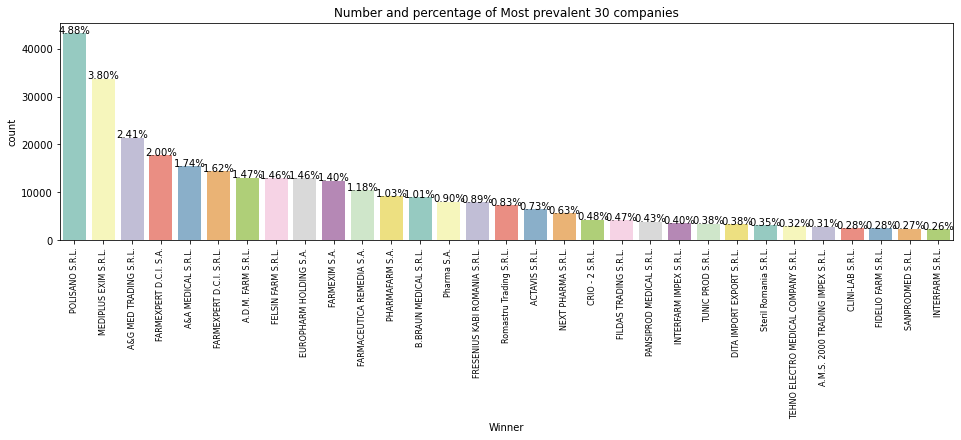

In [7]:
plot_count("Winner", "Most prevalent 30 companies", data_df, size=4)

Two companies, Polisano S.R.L and Mediplus Exim S.R.L. were winning each over 30,000 contracts. Both are companies active in Health. Actuall, all companies ranked on first 15 places are active in Health industry.

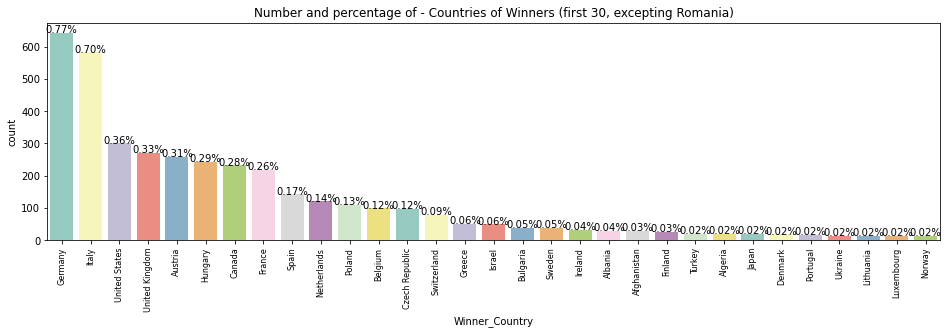

In [8]:
plot_count("Winner_Country", "- Countries of Winners (first 30, excepting Romania)", data_df.loc[data_df.Winner_Country!="Romania"], size=4)

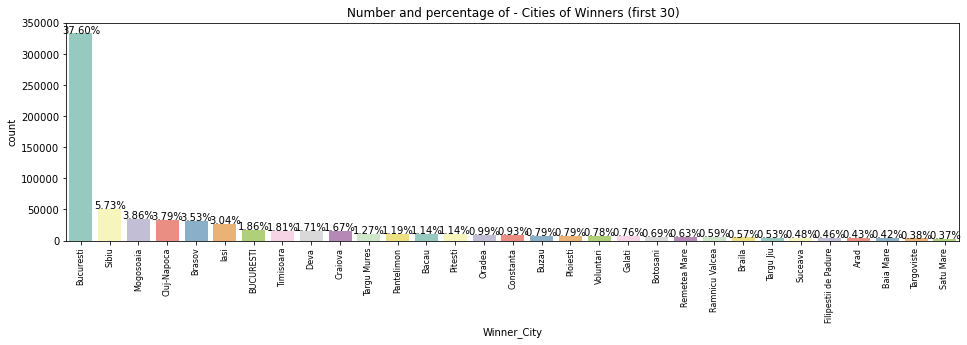

In [9]:
plot_count("Winner_City", "- Cities of Winners (first 30)", data_df, size=4)

The reason so many companies have address in Bucharest is because, although the activity is in various parts of the country, especially large companies would have the registered address in the capital city of Romania, Bucharest (Bucuresti in Romanian language).

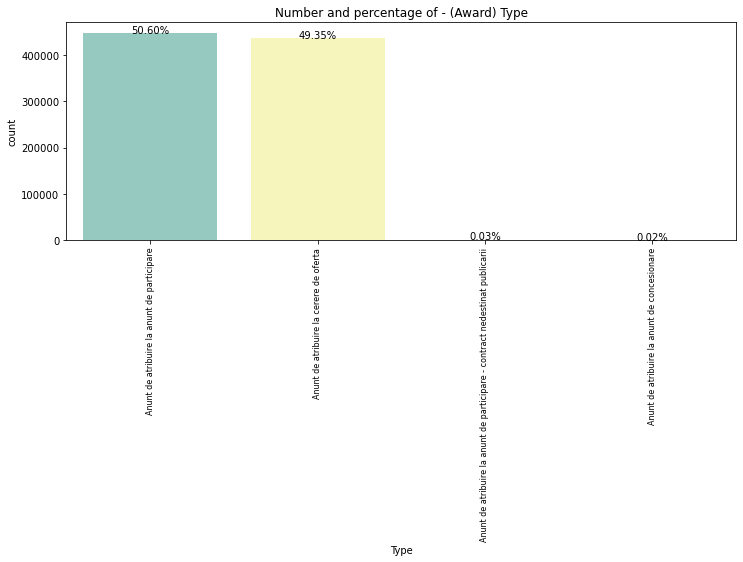

In [10]:
plot_count("Type", "- (Award) Type", data_df, size=3)

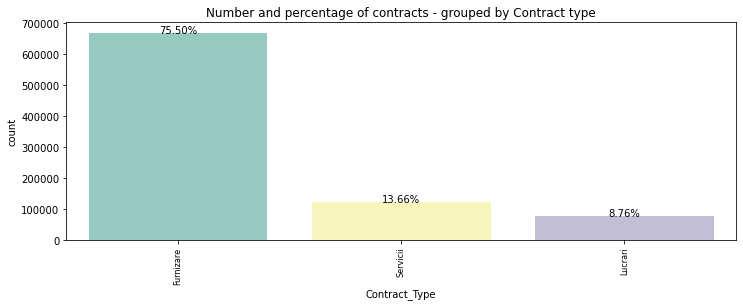

In [11]:
plot_count("Contract_Type", "contracts - grouped by Contract type", data_df, size=3)

Most of the contracts are for Supply, and next for Services. Only 8.76% are for Works. These are the number of contracts, not the amounts.

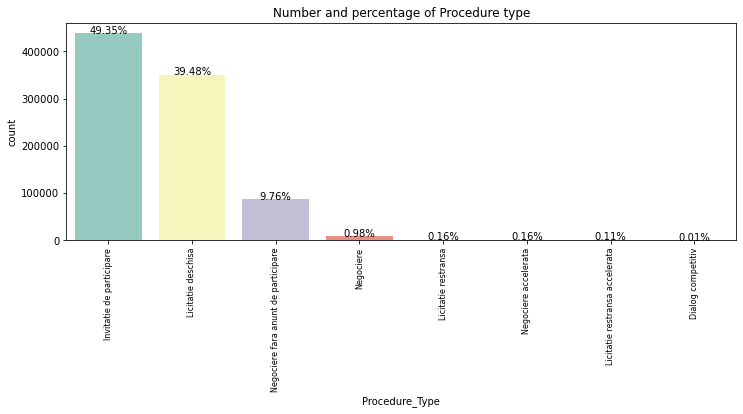

In [12]:
plot_count("Procedure_Type", "Procedure type", data_df, size=3)

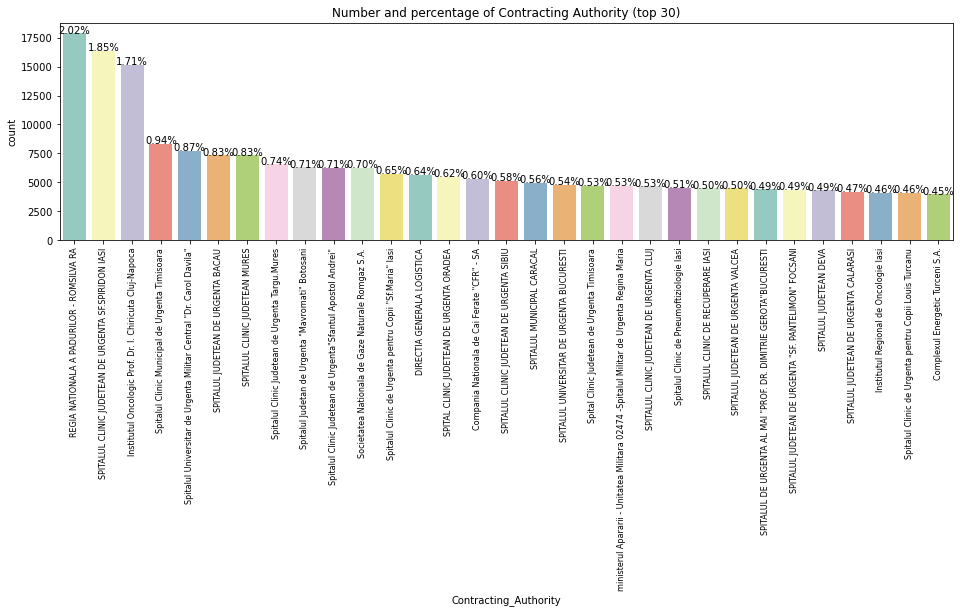

In [13]:
plot_count("Contracting_Authority", "Contracting Authority (top 30)", data_df, size=4)

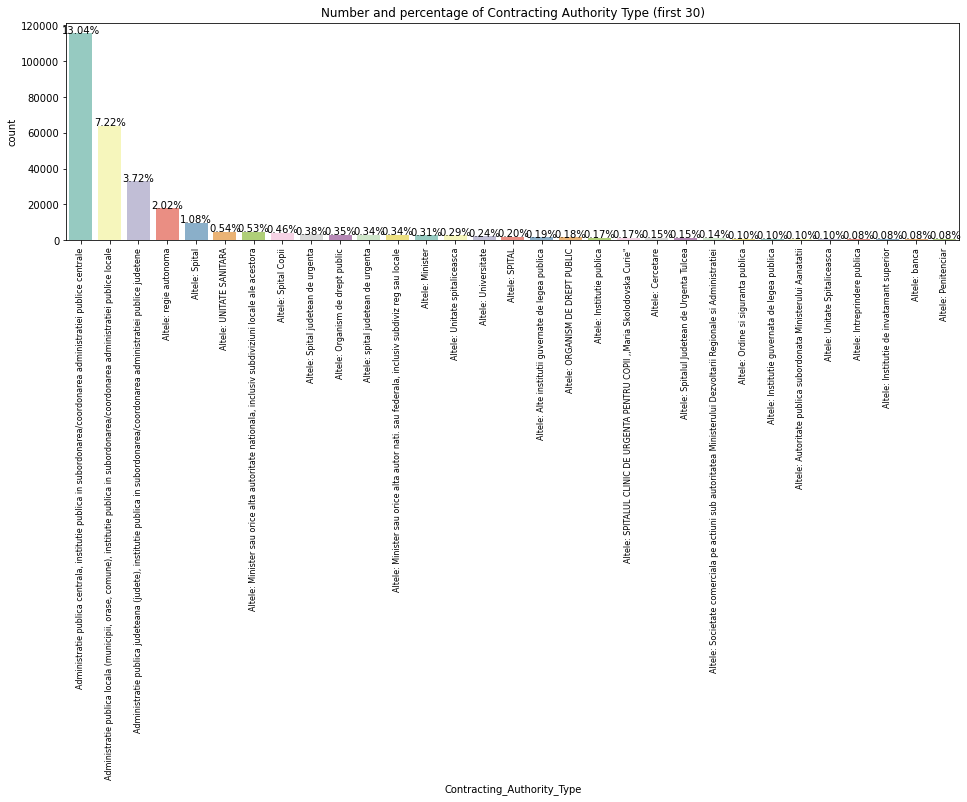

In [14]:
plot_count("Contracting_Authority_Type", "Contracting Authority Type (first 30)", data_df, size=4)

The first 3 position are contracting authorities from central, municipal or county public administrations.

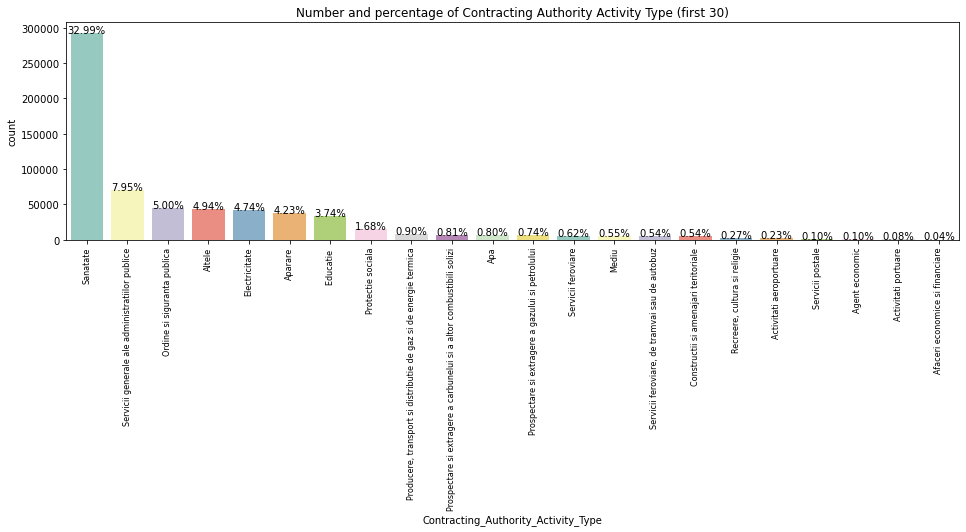

In [15]:
plot_count("Contracting_Authority_Activity_Type", "Contracting Authority Activity Type (first 30)", data_df, size=4)

As we expected, first 33% of the contracts are in Health, followed by General services for the public administrations, Order and public safety (Internal ministry), as well as Electricity, Agriculture, Defence, Education, Social policies. These are the number of contracts, not the value of contract.

Let's look now to values aggregated per year.

In [16]:
data_df[["Award_Announcement_Date"]].head()

Award_Announcement_Date
0  2007-09-17 10:18:49.187
1  2007-09-17 10:18:49.187
2  2007-11-28 01:30:00.800
3  2007-08-23 13:52:48.017
4  2007-08-06 16:00:14.820

Let's check the data type.

In [17]:
type(data_df["Award_Announcement_Date"][0])

str

We will need to convert to date.

In [18]:
from datetime import datetime
data_df["Award_Announcement_Date"] = data_df["Award_Announcement_Date"].apply(lambda x: datetime.strptime(x[0:10], '%Y-%m-%d'))

In [19]:
data_df["Award_Announcement_Year"] = data_df["Award_Announcement_Date"].dt.year
data_df["Award_Announcement_Month"] = data_df["Award_Announcement_Date"].dt.month

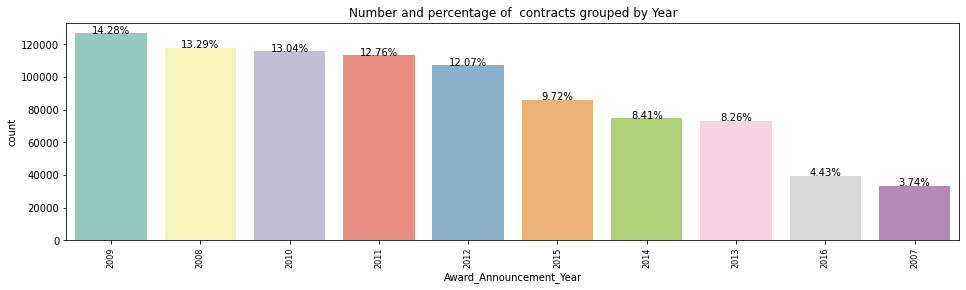

In [20]:
plot_count("Award_Announcement_Year", " contracts grouped by Year", data_df, size=4)

Let's aggregate the data per year.

In [21]:
agg_data = data_df.groupby(["Winner", "Winner_Country", "Award_Announcement_Year", "Contracting_Authority_Activity_Type"])["Value_RON"].agg(["sum", "count"])

In [22]:
agg_data_df = pd.DataFrame(agg_data).reset_index()
agg_data_df.columns = ["Winner", "Winner Country", "Year", "Activity Type", "Total", "Count"]

Let's look to top 10 companies by total per year or number of contracts per year.

In [23]:
agg_data_df.sort_values(by=["Total"], ascending=False).head(10)

Winner Winner Country  \
74813                                  S.C. DARCONS S.R.L        Romania   
34652                            FARMEXPERT D.C.I. S.R.L.        Romania   
27906                   Diamond Offshore Netherlands B.V.    Netherlands   
51015                                MEDIPLUS EXIM S.R.L.        Romania   
1725                               AEDIFICIA CARPATI S.A.        Romania   
76498   S.C. Expert Petroleum SRL (Înregistrat in Regi...        Romania   
3355                                      ALPINE BAU GmbH        Romania   
128722                                 STRACO GRUP S.R.L.        Romania   
34728                               FCC CONSTRUCCION S.A.        Romania   
8108                                            AZVI S.A.          Spain   

        Year                                     Activity Type         Total  \
74813   2015    Servicii generale ale administratiilor publice  3.462385e+09   
34652   2015                                          Sanatate  2.027201e+09   
27906   2013  Prospectare si extragere a gazului si petrolului  1.787626e+09   
51015   2015                                          Sanatate  1.725824e+09   
1725    2016                                            Altele  1.686871e+09   
76498   2012  Prospectare si extragere a gazului si petrolului  1.391287e+09   
3355    2013                                Servicii feroviare  1.255756e+09   
128722  2013                                Servicii feroviare  1.255756e+09   
34728   2013                                Servicii feroviare  1.255756e+09   
8108    2013                                Servicii feroviare  1.255756e+09   

        Count  
74813       1  
34652    3356  
27906       1  
51015    2598  
1725        2  
76498       1  
3355        1  
128722      1  
34728       1  
8108        1

In [24]:
agg_data_df.sort_values(by=["Count"], ascending=False).head(10)

Winner Winner Country  Year Activity Type  \
60386           POLISANO S.R.L.        Romania  2012      Sanatate   
60380           POLISANO S.R.L.        Romania  2011      Sanatate   
51000      MEDIPLUS EXIM S.R.L.        Romania  2011      Sanatate   
34652  FARMEXPERT D.C.I. S.R.L.        Romania  2015      Sanatate   
51004      MEDIPLUS EXIM S.R.L.        Romania  2012      Sanatate   
60397           POLISANO S.R.L.        Romania  2015      Sanatate   
34633    FARMEXPERT D.C.I. S.A.        Romania  2012      Sanatate   
60394           POLISANO S.R.L.        Romania  2014      Sanatate   
336      A&G MED TRADING S.R.L.        Romania  2011      Sanatate   
60376           POLISANO S.R.L.        Romania  2010      Sanatate   

              Total  Count  
60386  5.796463e+08   4716  
60380  3.462455e+08   4443  
51000  3.993156e+08   3792  
34652  2.027201e+09   3356  
51004  6.162929e+08   3222  
60397  1.079598e+09   3170  
34633  3.549890e+08   3112  
60394  1.046188e+09   3069  
336    9.870915e+07   3056  
60376  1.191939e+08   3053

In [25]:
agg_data_df = agg_data_df.sort_values(by=["Year"], ascending=True)

In [26]:
agg_data_df["Log(Total)"] = agg_data_df["Total"].apply(lambda x: 5 + np.log1p(x))

Let's show the data aggregated per activity type and year.

In [27]:
agg2_data = agg_data_df.groupby(["Year", "Activity Type"])["Total"].agg(["sum"])

In [28]:
agg2_data_df = pd.DataFrame(agg2_data).reset_index()
agg2_data_df.columns = ["Year", "Activity Type", "Total"]
agg2_data_df.head()

Year                    Activity Type         Total
0  2007          Activitati aeroportuare  1.246756e+08
1  2007              Activitati portuare  6.273099e+07
2  2007  Afaceri economice si financiare  7.844990e+06
3  2007                   Agent economic  3.796758e+06
4  2007                           Altele  1.320201e+09

In [29]:
def plot_time_variation(df, y='Total', hue='Activity Type', size=1, is_log=False):
    f, ax = plt.subplots(1,1, figsize=(4*size,3*size))
    groups = df[hue].unique()
    
    for group in groups:
        df_ = df[(df[hue]==group)] 
        g = sns.lineplot(x="Year", y=y, data=df_,  label=group)  
        ax.text(max(df_['Year']), (df_.loc[df_['Year']==max(df_['Year']), y]), str(group))
    plt.xticks(rotation=90)
    plt.title(f'{y} grouped by {hue}')
    if(is_log):
        ax.set(yscale="log")
    ax.grid(color='black', linestyle='dotted', linewidth=0.75)
    plt.show()  

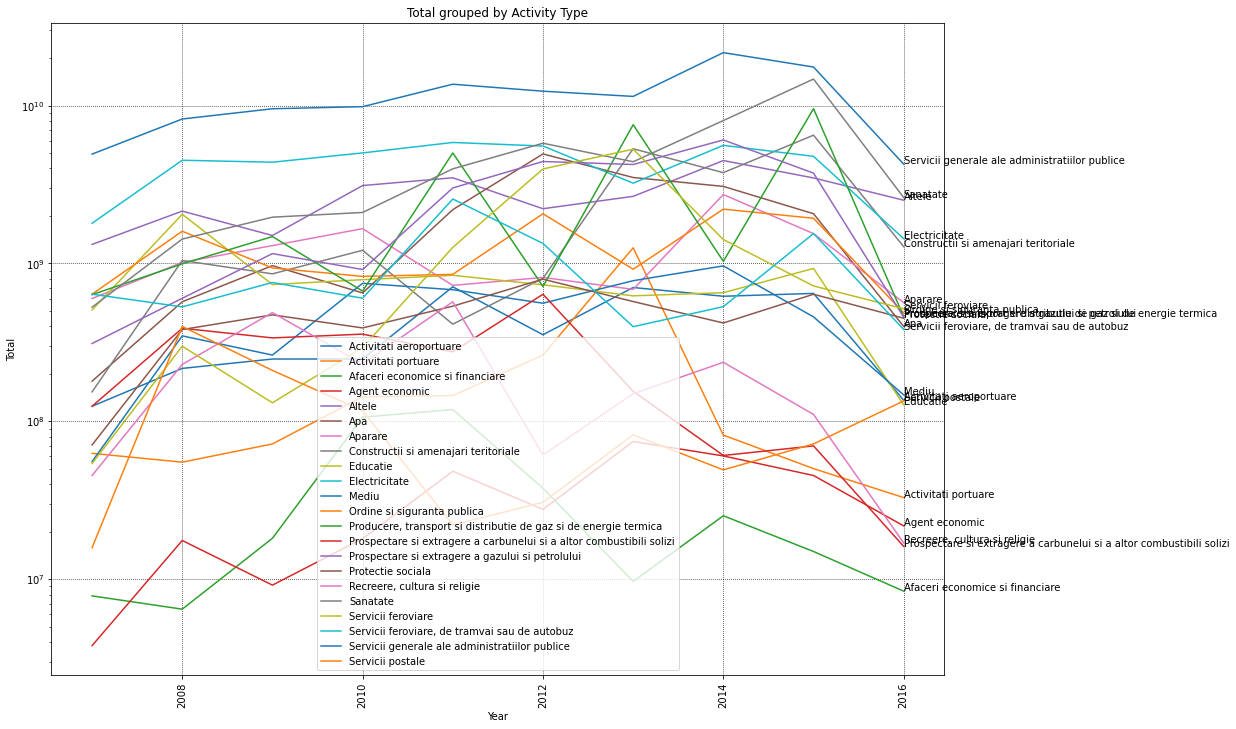

In [30]:
plot_time_variation(agg2_data_df, 'Total', 'Activity Type', 4, True)

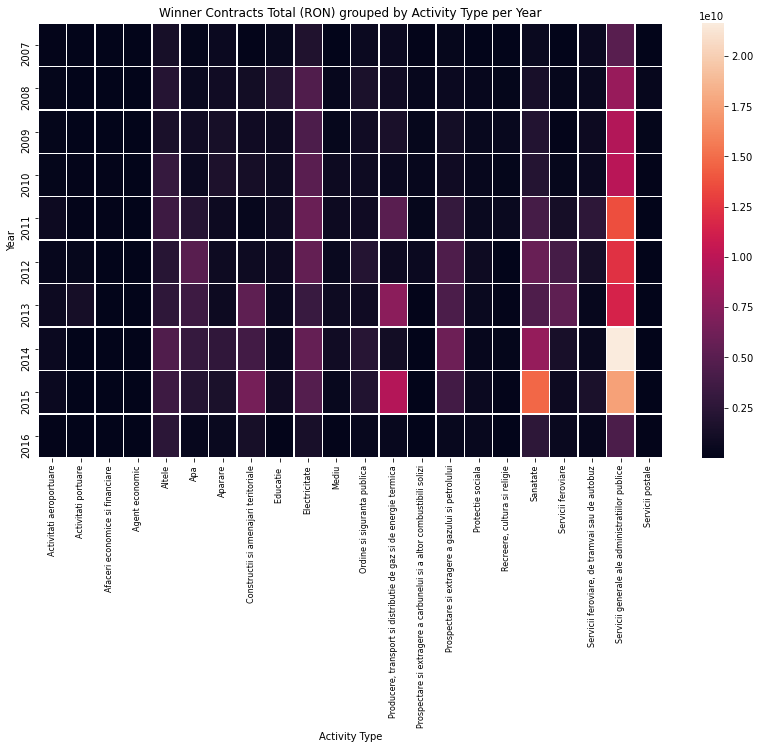

In [31]:
heatmap = agg2_data_df.pivot("Year", "Activity Type", 'Total')
fig, ax = plt.subplots(nrows=1,figsize=(14,8))
sns.heatmap(heatmap, linewidths=.5)
plt.title("Winner Contracts Total (RON) grouped by Activity Type per Year")
plt.xticks(rotation=90, size=8)

plt.show()

Let's filter to show only companies with a Total / year over 1M RON.

In [32]:
filtered_agg_data_df = agg_data_df.loc[agg_data_df.Total > 1000000]
filtered_agg_data_df.shape

(28824, 7)

In [33]:
import plotly.express as px
fig = px.scatter(filtered_agg_data_df, x='Total', y='Count', color='Activity Type', size='Log(Total)', size_max = 50,
                hover_name='Winner', log_x=True, animation_frame='Year',
                 animation_group='Activity Type', range_x=[1, 4000000000], range_y=[-1000, 5000])
fig.show()